# openSMILE

- Extension of [Data Engineering - Extracting Feature Sets](https://github.com/Brinkley97/csci_535_multimodal_probabilistic_learning/blob/main/play/extractFeatureSets.ipynb) by Detravious
- Specifcally following [Clustering: Anuran Calls(MFCCs)](https://www.kaggle.com/code/aysenur95/clustering-anuran-calls-mfccs#Anuran-Calls%F0%9F%90%B8%F0%9F%8E%BB%F0%9F%8E%B7%F0%9F%8E%BC%F0%9F%8E%BA-(MFCCs)-Clustering%F0%9F%90%B8) by AYSENUR
- Using [openSMILE documentation](https://audeering.github.io/opensmile/get-started.html?highlight=0_d_a#mfcc-features) and via [github](https://github.com/audeering/opensmile/blob/master/config/mfcc/MFCC12_0_D_A.conf)
- [msp](https://ecs.utdallas.edu/research/researchlabs/msp-lab/MSP-Improv.html) wav file

In [1]:
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opensmile
from HTKFeat import MFCC_HTK
from HTK import HCopy, HTKFile
import librosa
import librosa.display

# Load Data

- Wav files from msp
- Terminal command to get mfcc csv of wav file: 
`./SMILExtract SMILExtract -C config/features_to_extract/MFCC12_E_D_A.conf -I /Users/brinkley97/Documents/development/classes/csci_535_multimodal_probabilistic_learning/datasets/msp/r/MSP-IMPROV-S01A-F02-R-FF01.wav -O /Users/brinkley97/Documents/development/classes/csci_535_multimodal_probabilistic_learning/datasets/msp/r/r_output/output.MSP-IMPROV-S01A-F02-R-FF01.csv`
- See another example in [notes with Alex](https://docs.google.com/document/d/1DSHAp8NZlhInIOWRz4WURTkKFuaGkx8C_0565-kI-vM/edit?usp=sharing)

In [2]:
BASE = "/Users/brinkley97/Documents/development/"
CLASS_PATH = "classes/csci_535_multimodal_probabilistic_learning/"
DATASET_PATH = "datasets/msp/"
all_msp_wav_files = BASE + CLASS_PATH + DATASET_PATH + 'full_r_and_t_mspPaths.csv'

In [3]:
msp_wav_files = pd.read_csv(all_msp_wav_files)
msp_wav_files

,A,H,N,S
0,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...
1,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...
2,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...
3,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...
4,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...,/Users/brinkley97/Documents/development/classe...
...,...,...,...,...
331,NaN,NaN,NaN,/Users/brinkley97/Documents/development/classe...
332,NaN,NaN,NaN,/Users/brinkley97/Documents/development/classe...
333,NaN,NaN,NaN,/Users/brinkley97/Documents/development/classe...
334,NaN,NaN,NaN,/Users/brinkley97/Documents/development/classe...


In [4]:
angry_wav_files = msp_wav_files.loc[0:, 'A']
angry_wav_files

0      /Users/brinkley97/Documents/development/classe...
1      /Users/brinkley97/Documents/development/classe...
2      /Users/brinkley97/Documents/development/classe...
3      /Users/brinkley97/Documents/development/classe...
4      /Users/brinkley97/Documents/development/classe...
                             ...                        
331                                                  NaN
332                                                  NaN
333                                                  NaN
334                                                  NaN
335                                                  NaN
Name: A, Length: 336, dtype: object

In [5]:
angry_wav_files[0]

'/Users/brinkley97/Documents/development/classes/csci_535_multimodal_probabilistic_learning/datasets/msp/session1/S01A/R/MSP-IMPROV-S01A-M01-R-MM01.wav'

In [6]:
# 509 dimensions/frames (rows top to bottom and vice versa) with 39 input features
# double check: each column is some emotion so, there could exist 39 different emotions for this one input wav -> mfcc -> csv
# how to prediction emotion? Read literature or test with combining frames by averaging frames, max, or min frames, differnce between x and x frames, weighted average frames
# interpretability for mfccs to show which features are more important

In [7]:

angry_wav_files_0 = '/Users/brinkley97/Documents/development/classes/csci_535_multimodal_probabilistic_learning/datasets/msp/r/r_output/output.MSP-IMPROV-S01A-F02-R-FF01.csv'
load_a_r = pd.read_csv(angry_wav_files_0, sep=';')
load_a_r

,-4.402396e+00,-5.439605e+00,-1.289993e+01,9.281517e+00,1.094927e+01,1.233393e+01,6.419990e+00,-1.021819e+01,-4.764394e+00,9.001127e+00,...,3.081546e-01,5.856767e-01,1.698664e-01,4.961326e-01,-2.570364e-01,1.303478e-01,2.065253e-01,3.368071e-01,-7.499952e-01,-8.066816e-03
0,-6.630476,-0.226619,-3.664904,10.132200,9.799482,18.280790,5.812801,3.006221,-1.993221,0.863900,...,1.073805,1.200000,-0.098245,0.403047,-1.248195,-1.017239,0.023610,0.746632,-1.021529,-0.032236
1,-8.202093,4.031761,-3.161681,-3.039783,2.603240,14.746630,3.920820,5.767556,10.167880,15.058370,...,1.709434,1.164627,-0.380721,-0.142776,-1.721704,-1.780209,-0.372574,0.268991,-0.944816,-0.070864
2,-8.679733,2.705016,-6.474727,4.856027,11.001820,22.869340,13.260260,5.850021,13.016300,13.297060,...,1.058210,0.057602,-0.772340,-0.777716,-1.550694,-1.633161,-0.423570,0.069972,-0.272429,-0.066836
3,-9.276648,4.488095,-1.282270,7.072599,13.668870,16.494620,8.100087,3.800385,2.842914,7.268346,...,-0.139386,-1.014090,-0.314260,-0.529450,-0.481405,0.443656,0.065298,-1.101036,-0.249696,-0.010664
4,-10.590000,-0.021973,-3.858452,16.500680,19.224890,19.802380,6.893286,-1.038369,-6.840960,6.090219,...,-1.490869,-1.329082,-0.443049,-0.189877,0.285815,1.548734,0.579876,-0.605582,0.473323,0.055102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-12.988090,5.284486,4.369596,7.923039,5.978137,7.165684,5.428536,11.043340,13.781130,4.618937,...,0.401774,0.755106,0.179232,-0.076112,-0.289343,0.454214,0.303246,0.394975,1.231167,0.108693
505,-14.641890,1.471151,-1.678684,-0.482417,3.590819,10.023450,4.854248,8.097338,-7.055781,-2.710666,...,0.449725,0.371551,-0.290865,-1.043287,-0.911426,1.008743,1.406648,1.310425,1.337401,0.118870
506,-13.245200,5.134990,0.187150,4.390638,4.442421,7.213739,9.913300,10.823020,9.523331,0.520374,...,-0.178257,-0.378545,-0.603349,-2.040744,-1.509011,-0.220457,1.617684,0.553844,0.578879,0.086191
507,-15.699990,2.979469,1.350137,8.156222,17.610360,11.727050,7.873103,6.047454,10.150610,-0.530417,...,-0.407810,-1.097132,-0.629185,-1.380619,-0.555205,-0.743379,1.170620,0.065092,0.122592,0.020167


In [8]:
def rename_columns(df, N):
    """
    Parameters:
    df -- pd df (dataset)
    N -- int (length of df)
    
    Return:
    lag_values -- list (lags)
    lag_col_names -- list (column names with lag, respectively) 
    """
    
    # lag_values = []
    col_names = []
    
    for k in range(0, N):
        # print(k)
        
        # lag = -1 * k
        # lag_values.append(df.shift(lag))
        new_col_name = "MFCCs_" + str(k)
        col_names.append(new_col_name)
        
    return col_names

In [9]:
mfccs_df = []
mfccs = [load_a_r]
for mfcc in mfccs:
    N, D = mfcc.shape
    print(N, D)
    cols = rename_columns(mfcc, D)
    print(cols)
    mfcc.columns=[cols]
    mfccs_df.append(mfcc)

509 39
['MFCCs_0', 'MFCCs_1', 'MFCCs_2', 'MFCCs_3', 'MFCCs_4', 'MFCCs_5', 'MFCCs_6', 'MFCCs_7', 'MFCCs_8', 'MFCCs_9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'MFCCs_23', 'MFCCs_24', 'MFCCs_25', 'MFCCs_26', 'MFCCs_27', 'MFCCs_28', 'MFCCs_29', 'MFCCs_30', 'MFCCs_31', 'MFCCs_32', 'MFCCs_33', 'MFCCs_34', 'MFCCs_35', 'MFCCs_36', 'MFCCs_37', 'MFCCs_38']


In [10]:
# [0 or 1]
mfcc_df = mfccs_df[0]
mfcc_df

,MFCCs_0,MFCCs_1,MFCCs_2,MFCCs_3,MFCCs_4,MFCCs_5,MFCCs_6,MFCCs_7,MFCCs_8,MFCCs_9,...,MFCCs_29,MFCCs_30,MFCCs_31,MFCCs_32,MFCCs_33,MFCCs_34,MFCCs_35,MFCCs_36,MFCCs_37,MFCCs_38
0,-6.630476,-0.226619,-3.664904,10.132200,9.799482,18.280790,5.812801,3.006221,-1.993221,0.863900,...,1.073805,1.200000,-0.098245,0.403047,-1.248195,-1.017239,0.023610,0.746632,-1.021529,-0.032236
1,-8.202093,4.031761,-3.161681,-3.039783,2.603240,14.746630,3.920820,5.767556,10.167880,15.058370,...,1.709434,1.164627,-0.380721,-0.142776,-1.721704,-1.780209,-0.372574,0.268991,-0.944816,-0.070864
2,-8.679733,2.705016,-6.474727,4.856027,11.001820,22.869340,13.260260,5.850021,13.016300,13.297060,...,1.058210,0.057602,-0.772340,-0.777716,-1.550694,-1.633161,-0.423570,0.069972,-0.272429,-0.066836
3,-9.276648,4.488095,-1.282270,7.072599,13.668870,16.494620,8.100087,3.800385,2.842914,7.268346,...,-0.139386,-1.014090,-0.314260,-0.529450,-0.481405,0.443656,0.065298,-1.101036,-0.249696,-0.010664
4,-10.590000,-0.021973,-3.858452,16.500680,19.224890,19.802380,6.893286,-1.038369,-6.840960,6.090219,...,-1.490869,-1.329082,-0.443049,-0.189877,0.285815,1.548734,0.579876,-0.605582,0.473323,0.055102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-12.988090,5.284486,4.369596,7.923039,5.978137,7.165684,5.428536,11.043340,13.781130,4.618937,...,0.401774,0.755106,0.179232,-0.076112,-0.289343,0.454214,0.303246,0.394975,1.231167,0.108693
505,-14.641890,1.471151,-1.678684,-0.482417,3.590819,10.023450,4.854248,8.097338,-7.055781,-2.710666,...,0.449725,0.371551,-0.290865,-1.043287,-0.911426,1.008743,1.406648,1.310425,1.337401,0.118870
506,-13.245200,5.134990,0.187150,4.390638,4.442421,7.213739,9.913300,10.823020,9.523331,0.520374,...,-0.178257,-0.378545,-0.603349,-2.040744,-1.509011,-0.220457,1.617684,0.553844,0.578879,0.086191
507,-15.699990,2.979469,1.350137,8.156222,17.610360,11.727050,7.873103,6.047454,10.150610,-0.530417,...,-0.407810,-1.097132,-0.629185,-1.380619,-0.555205,-0.743379,1.170620,0.065092,0.122592,0.020167


In [11]:
N, D = mfcc_df.shape
print(N, D)

509 39


In [12]:
mfcc_df.describe()

,MFCCs_0,MFCCs_1,MFCCs_2,MFCCs_3,MFCCs_4,MFCCs_5,MFCCs_6,MFCCs_7,MFCCs_8,MFCCs_9,...,MFCCs_29,MFCCs_30,MFCCs_31,MFCCs_32,MFCCs_33,MFCCs_34,MFCCs_35,MFCCs_36,MFCCs_37,MFCCs_38
count,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,...,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000,509.000000
mean,-8.893343,-2.446183,-8.788596,1.750106,4.627769,3.542730,4.598941,0.957325,-2.948679,2.217946,...,0.003829,0.001373,-0.002936,-0.004800,-0.011890,-0.006287,0.004198,0.000361,0.002250,0.000202
std,6.879241,12.612452,12.171754,12.923365,10.232887,14.203572,11.848176,9.906482,12.779541,9.952091,...,1.013126,1.070506,1.087730,1.174755,1.246158,1.236579,1.175531,1.068968,1.111419,0.106214
min,-26.245940,-47.340300,-54.030030,-61.739020,-41.272470,-62.761460,-41.277030,-40.080120,-51.700210,-32.868840,...,-4.780427,-5.816718,-3.179269,-5.091431,-6.477394,-6.022530,-4.474601,-2.883613,-3.605196,-0.389160
25%,-13.245200,-4.203825,-12.300960,0.309127,0.783161,0.424643,-0.742826,-4.169666,-7.848828,-2.056256,...,-0.531981,-0.596812,-0.743477,-0.708187,-0.742939,-0.833799,-0.741901,-0.685089,-0.725278,-0.055809
50%,-10.357090,2.028217,-5.807142,4.408032,5.835116,6.460131,4.370688,1.219282,-0.101419,3.343720,...,0.020791,0.018167,-0.060884,0.107074,0.024674,-0.037084,-0.003958,-0.020423,0.040050,-0.000660
75%,-6.304010,4.973289,-1.437546,8.319946,10.266270,11.666000,10.299880,6.768215,5.262228,7.938721,...,0.592487,0.684304,0.717141,0.803727,0.705434,0.848671,0.802638,0.728020,0.771878,0.061221
max,16.038140,14.204910,8.037656,27.128660,28.867870,31.113800,57.597220,39.201520,20.383960,31.679480,...,4.606445,5.223167,4.131502,3.194230,5.741135,4.992118,4.781427,3.864461,3.603352,0.436963


In [13]:
mfcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (MFCCs_0,)   509 non-null    float64
 1   (MFCCs_1,)   509 non-null    float64
 2   (MFCCs_2,)   509 non-null    float64
 3   (MFCCs_3,)   509 non-null    float64
 4   (MFCCs_4,)   509 non-null    float64
 5   (MFCCs_5,)   509 non-null    float64
 6   (MFCCs_6,)   509 non-null    float64
 7   (MFCCs_7,)   509 non-null    float64
 8   (MFCCs_8,)   509 non-null    float64
 9   (MFCCs_9,)   509 non-null    float64
 10  (MFCCs_10,)  509 non-null    float64
 11  (MFCCs_11,)  509 non-null    float64
 12  (MFCCs_12,)  509 non-null    float64
 13  (MFCCs_13,)  509 non-null    float64
 14  (MFCCs_14,)  509 non-null    float64
 15  (MFCCs_15,)  509 non-null    float64
 16  (MFCCs_16,)  509 non-null    float64
 17  (MFCCs_17,)  509 non-null    float64
 18  (MFCCs_18,)  509 non-null    float64
 19  (MFCCs_1

In [14]:
mfcc_df.nunique()

MFCCs_0     509
MFCCs_1     509
MFCCs_2     509
MFCCs_3     509
MFCCs_4     509
MFCCs_5     509
MFCCs_6     509
MFCCs_7     509
MFCCs_8     509
MFCCs_9     509
MFCCs_10    509
MFCCs_11    509
MFCCs_12    508
MFCCs_13    509
MFCCs_14    509
MFCCs_15    509
MFCCs_16    509
MFCCs_17    509
MFCCs_18    509
MFCCs_19    509
MFCCs_20    509
MFCCs_21    509
MFCCs_22    509
MFCCs_23    509
MFCCs_24    509
MFCCs_25    509
MFCCs_26    509
MFCCs_27    509
MFCCs_28    509
MFCCs_29    509
MFCCs_30    509
MFCCs_31    509
MFCCs_32    509
MFCCs_33    509
MFCCs_34    509
MFCCs_35    509
MFCCs_36    509
MFCCs_37    509
MFCCs_38    509
dtype: int64

In [15]:
mfcc_df.isnull().sum()

MFCCs_0     0
MFCCs_1     0
MFCCs_2     0
MFCCs_3     0
MFCCs_4     0
MFCCs_5     0
MFCCs_6     0
MFCCs_7     0
MFCCs_8     0
MFCCs_9     0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
MFCCs_23    0
MFCCs_24    0
MFCCs_25    0
MFCCs_26    0
MFCCs_27    0
MFCCs_28    0
MFCCs_29    0
MFCCs_30    0
MFCCs_31    0
MFCCs_32    0
MFCCs_33    0
MFCCs_34    0
MFCCs_35    0
MFCCs_36    0
MFCCs_37    0
MFCCs_38    0
dtype: int64

<AxesSubplot: ylabel='count'>

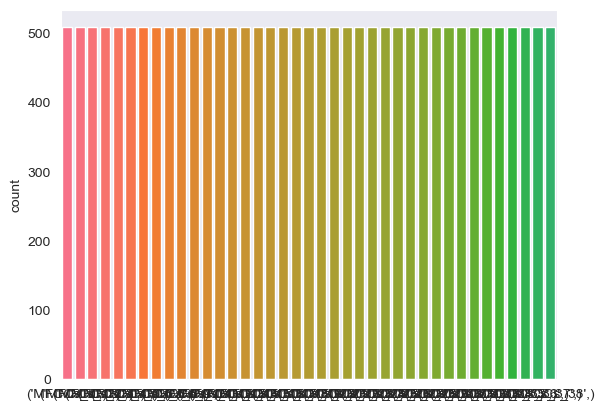

In [16]:
sns.set_style("dark")
sns.countplot(data=mfcc_df, palette=sns.color_palette("husl", 100), saturation=10)

[('MFCCs_0',), ('MFCCs_1',), ('MFCCs_2',), ('MFCCs_3',), ('MFCCs_4',), ('MFCCs_5',), ('MFCCs_6',), ('MFCCs_7',), ('MFCCs_8',), ('MFCCs_9',), ('MFCCs_10',), ('MFCCs_11',), ('MFCCs_12',), ('MFCCs_13',), ('MFCCs_14',), ('MFCCs_15',), ('MFCCs_16',), ('MFCCs_17',), ('MFCCs_18',), ('MFCCs_19',), ('MFCCs_20',), ('MFCCs_21',), ('MFCCs_22',), ('MFCCs_23',), ('MFCCs_24',), ('MFCCs_25',), ('MFCCs_26',), ('MFCCs_27',), ('MFCCs_28',), ('MFCCs_29',), ('MFCCs_30',), ('MFCCs_31',), ('MFCCs_32',), ('MFCCs_33',), ('MFCCs_34',), ('MFCCs_35',), ('MFCCs_36',), ('MFCCs_37',), ('MFCCs_38',)]


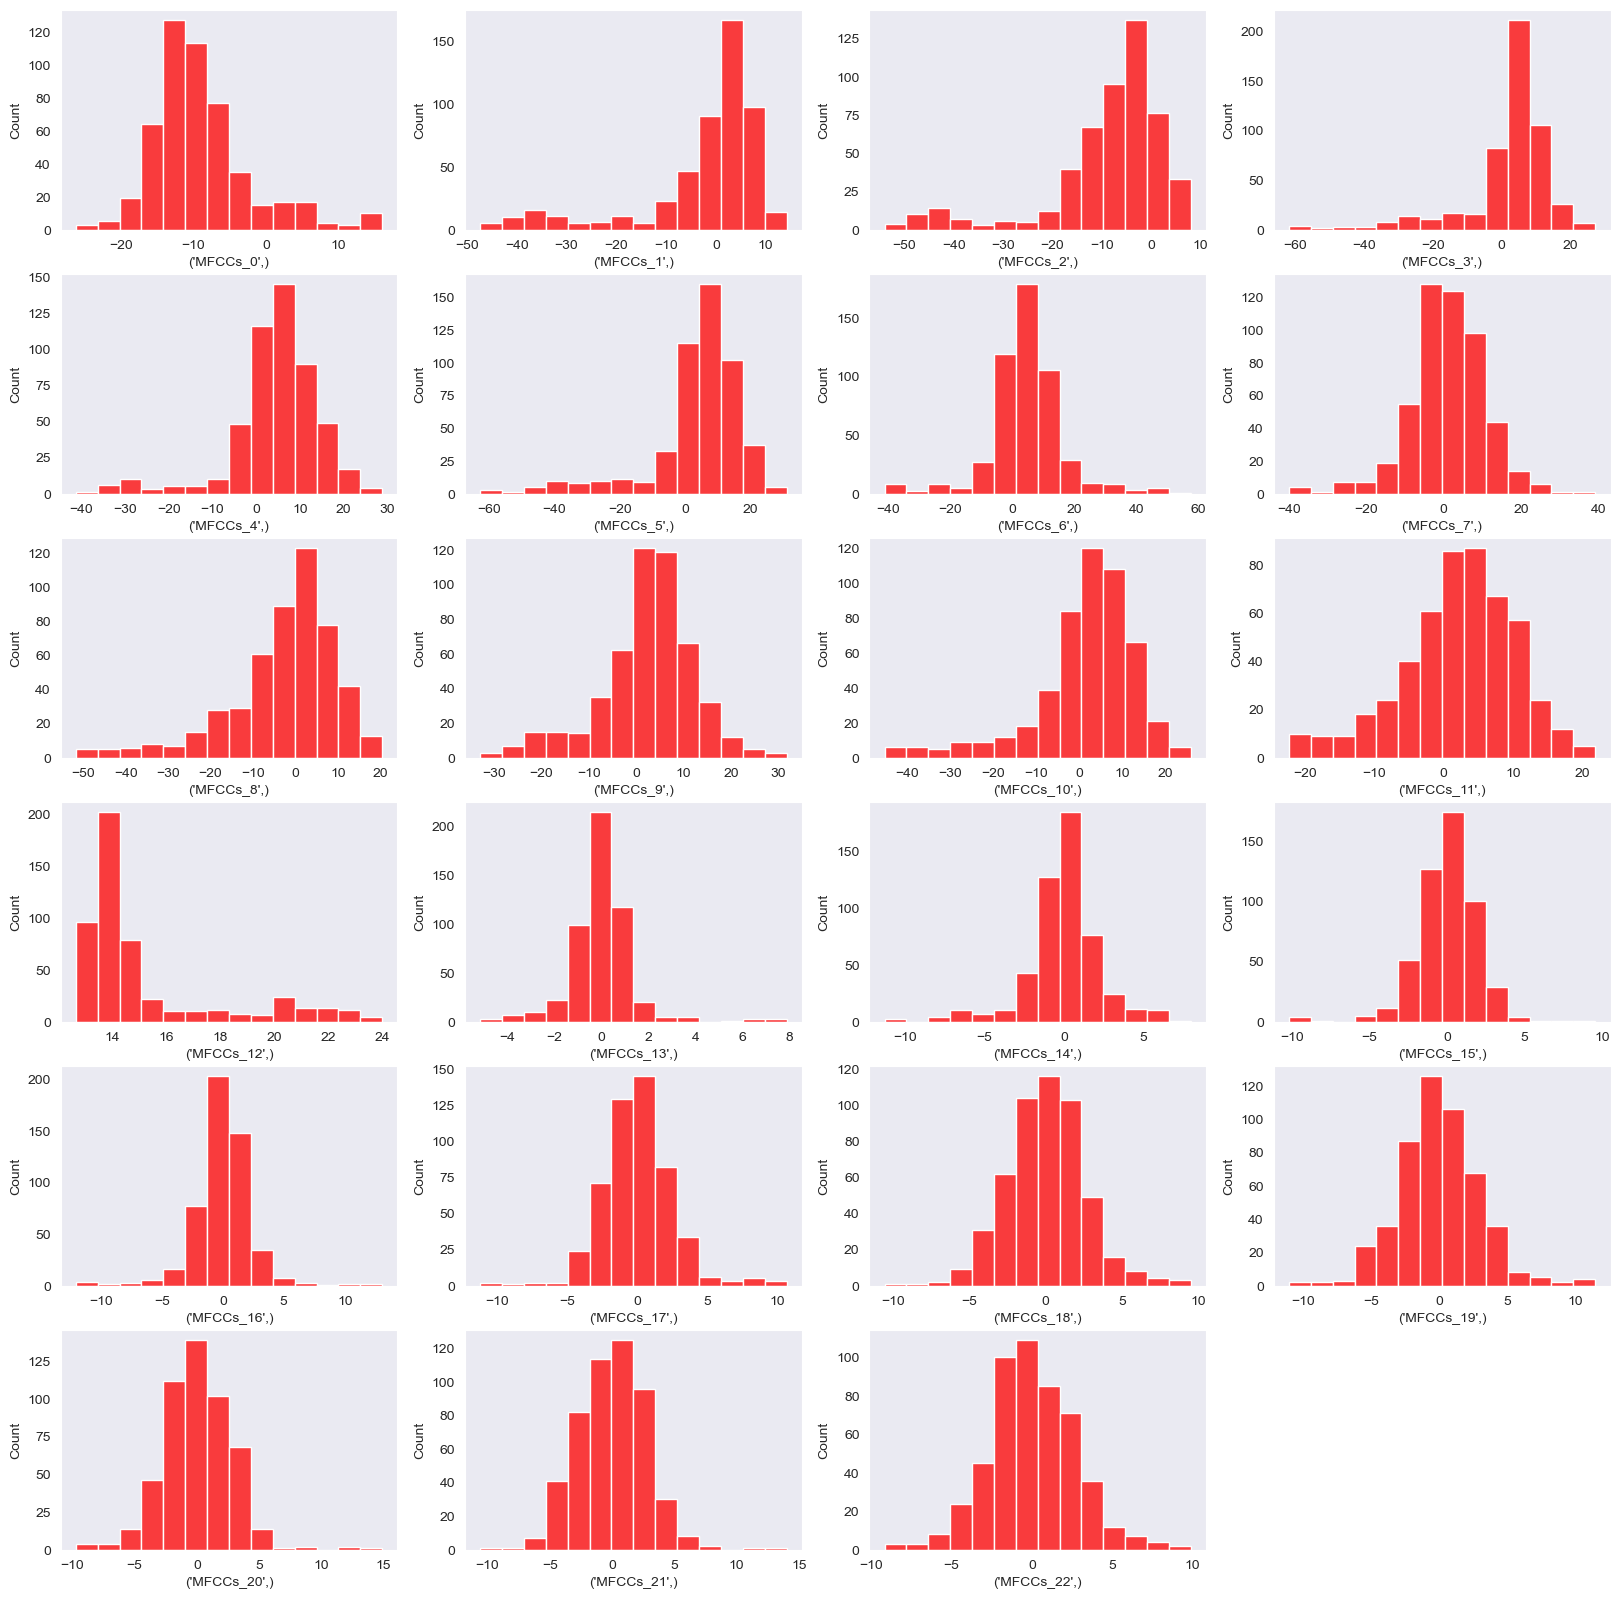

In [17]:
cont_feature_col=mfcc_df.columns.to_list()
print(cont_feature_col)
cont_df = mfcc_df[cont_feature_col]
plt.figure(figsize=(20,20))
for i in range(1, 24):
    plt.subplot(6, 4, i)
    sns.histplot(cont_df[mfcc_df.columns[i-1]], bins=14, kde_kws={'bw': 0.1}, color="r")

In [18]:
cont_df

,MFCCs_0,MFCCs_1,MFCCs_2,MFCCs_3,MFCCs_4,MFCCs_5,MFCCs_6,MFCCs_7,MFCCs_8,MFCCs_9,...,MFCCs_29,MFCCs_30,MFCCs_31,MFCCs_32,MFCCs_33,MFCCs_34,MFCCs_35,MFCCs_36,MFCCs_37,MFCCs_38
0,-6.630476,-0.226619,-3.664904,10.132200,9.799482,18.280790,5.812801,3.006221,-1.993221,0.863900,...,1.073805,1.200000,-0.098245,0.403047,-1.248195,-1.017239,0.023610,0.746632,-1.021529,-0.032236
1,-8.202093,4.031761,-3.161681,-3.039783,2.603240,14.746630,3.920820,5.767556,10.167880,15.058370,...,1.709434,1.164627,-0.380721,-0.142776,-1.721704,-1.780209,-0.372574,0.268991,-0.944816,-0.070864
2,-8.679733,2.705016,-6.474727,4.856027,11.001820,22.869340,13.260260,5.850021,13.016300,13.297060,...,1.058210,0.057602,-0.772340,-0.777716,-1.550694,-1.633161,-0.423570,0.069972,-0.272429,-0.066836
3,-9.276648,4.488095,-1.282270,7.072599,13.668870,16.494620,8.100087,3.800385,2.842914,7.268346,...,-0.139386,-1.014090,-0.314260,-0.529450,-0.481405,0.443656,0.065298,-1.101036,-0.249696,-0.010664
4,-10.590000,-0.021973,-3.858452,16.500680,19.224890,19.802380,6.893286,-1.038369,-6.840960,6.090219,...,-1.490869,-1.329082,-0.443049,-0.189877,0.285815,1.548734,0.579876,-0.605582,0.473323,0.055102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,-12.988090,5.284486,4.369596,7.923039,5.978137,7.165684,5.428536,11.043340,13.781130,4.618937,...,0.401774,0.755106,0.179232,-0.076112,-0.289343,0.454214,0.303246,0.394975,1.231167,0.108693
505,-14.641890,1.471151,-1.678684,-0.482417,3.590819,10.023450,4.854248,8.097338,-7.055781,-2.710666,...,0.449725,0.371551,-0.290865,-1.043287,-0.911426,1.008743,1.406648,1.310425,1.337401,0.118870
506,-13.245200,5.134990,0.187150,4.390638,4.442421,7.213739,9.913300,10.823020,9.523331,0.520374,...,-0.178257,-0.378545,-0.603349,-2.040744,-1.509011,-0.220457,1.617684,0.553844,0.578879,0.086191
507,-15.699990,2.979469,1.350137,8.156222,17.610360,11.727050,7.873103,6.047454,10.150610,-0.530417,...,-0.407810,-1.097132,-0.629185,-1.380619,-0.555205,-0.743379,1.170620,0.065092,0.122592,0.020167


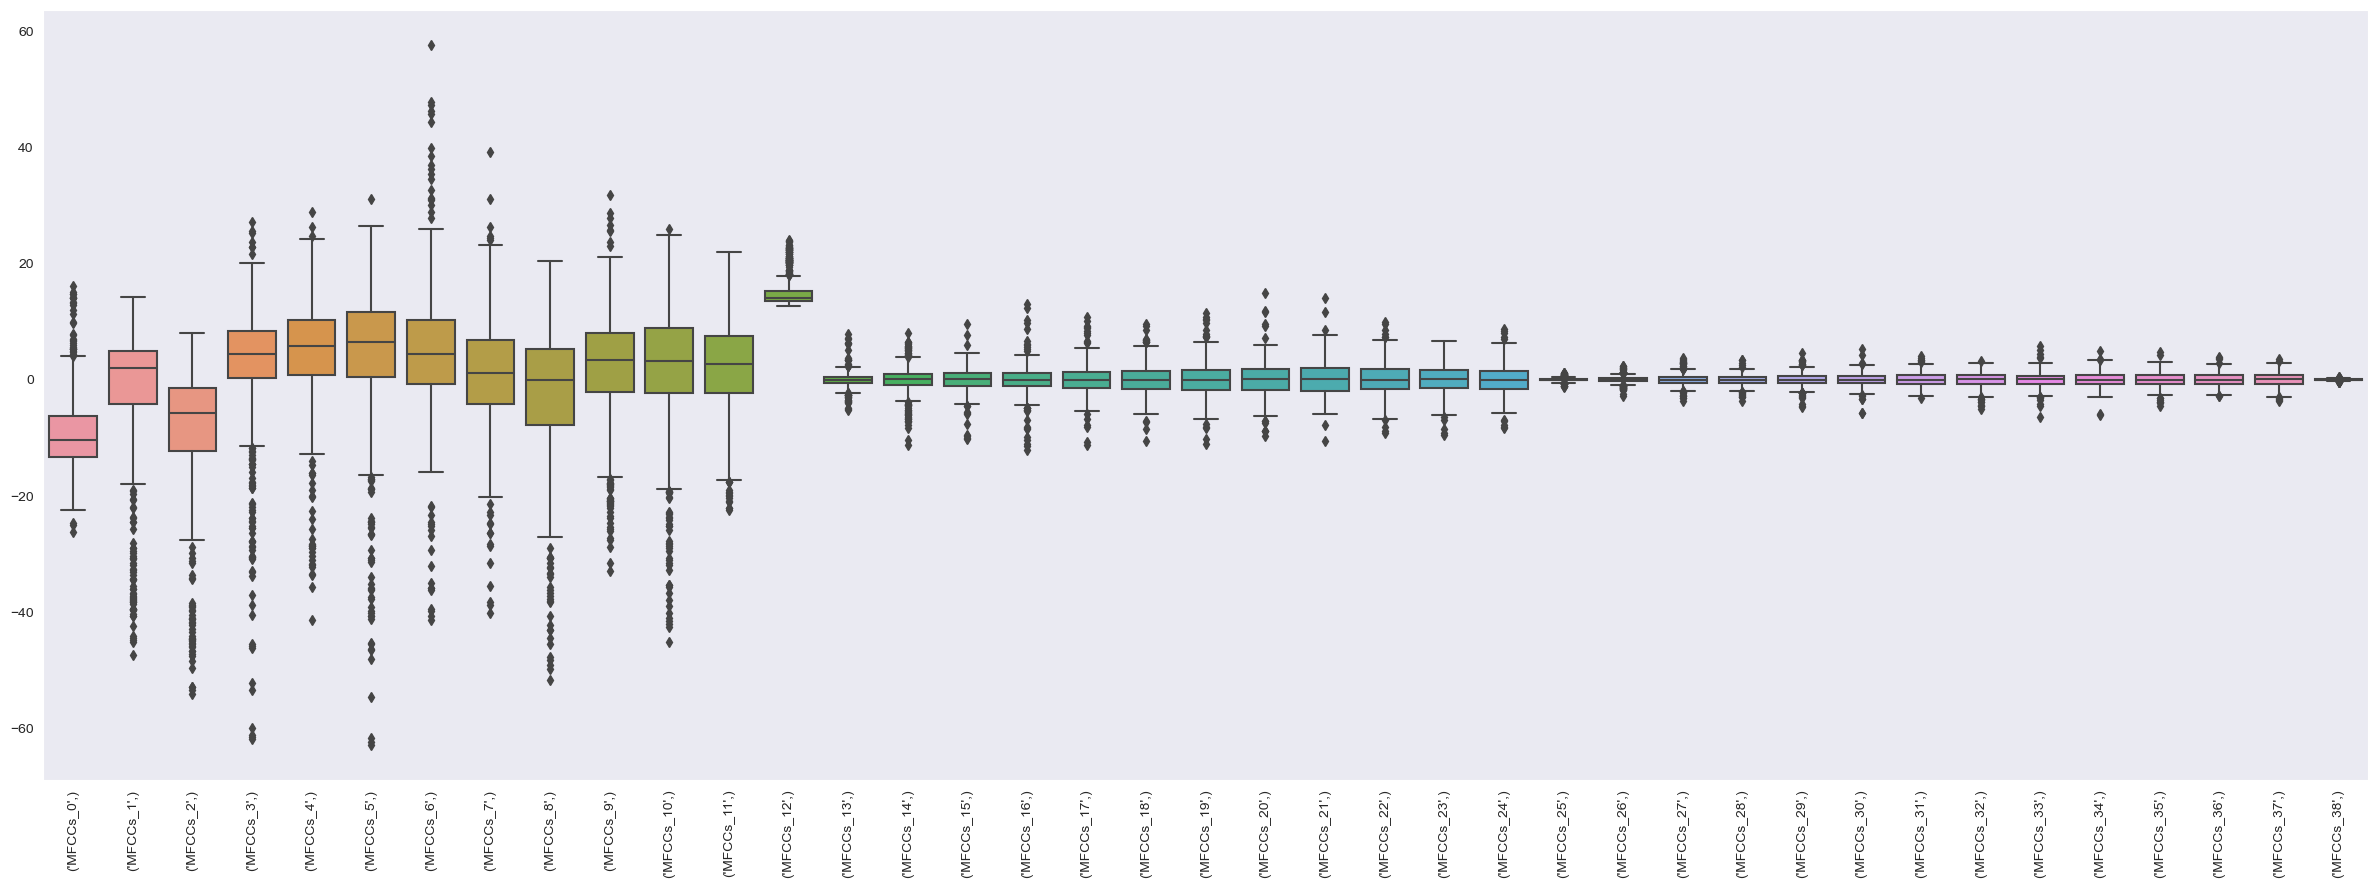

In [19]:
plt.figure(figsize=(30,10))
sns.boxplot(data=cont_df)
plt.xticks(rotation=90)
plt.show()